In [20]:
import os
%load_ext autoreload
%autoreload 2
import pandas as pd
from src.load_data import get_data
dataset= "loadCurveTwoFull"
load_data = get_data(dataset)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
path = f"../eda/{dataset}"
# Erstelle den Ordner, falls er nicht existiert
if not os.path.exists(path):
    os.makedirs(path)



In [22]:
def aggregate_daily_data(df):
    """
    Aggregiert die Daten auf Tagesbasis unter Verwendung der Spalten für Jahr, Monat und Tag
    und fügt die aggregierten Werte zum ursprünglichen DataFrame hinzu.
    """
    # Stelle sicher, dass alle notwendigen Spalten vorhanden sind
    if not all(col in df.columns for col in ['startDate_year', 'startDate_month', 'startDate_day', 'electricLoad']):
        raise ValueError("Einer der erforderlichen Spalten fehlt im DataFrame.")

    # Konstruiere das Datum direkt ohne Umbenennung
    df['temp_date'] = pd.to_datetime({
        'year': df['startDate_year'], 
        'month': df['startDate_month'], 
        'day': df['startDate_day']
    })
    
    # Aggregiere die Lastdaten auf Tagesbasis
    daily_load = df.groupby('temp_date')['electricLoad'].mean().reset_index(name='mean_electricLoad')
    
    # Füge die aggregierten Werte zum ursprünglichen DataFrame hinzu
    df = pd.merge(df, daily_load, on='temp_date', how='left')
    
    return df


In [23]:
load_data_with_mean_electricLoad =aggregate_daily_data(load_data)
load_data_with_mean_electricLoad

,electricLoad,t1,t2,r1,r2,dayofweek,startDate_year,startDate_month,startDate_day,startDate_hour,startDate_minute,holiday,schoolHoliday,temp_date,mean_electricLoad
0,67.75,8.83,8.40,0.0,0.0,6,2012,1,1,0,0,1,1,2012-01-01,60.072188
1,65.78,8.83,8.40,0.0,0.0,6,2012,1,1,0,15,1,1,2012-01-01,60.072188
2,66.17,8.83,8.40,0.0,0.0,6,2012,1,1,0,30,1,1,2012-01-01,60.072188
3,65.81,8.83,8.40,0.0,0.0,6,2012,1,1,0,45,1,1,2012-01-01,60.072188
4,64.24,8.89,8.50,0.0,0.0,6,2012,1,1,1,0,1,1,2012-01-01,60.072188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116731,44.86,9.60,9.30,0.0,0.0,3,2015,4,30,22,45,0,0,2015-04-30,41.352292
116732,44.48,9.58,9.25,0.0,0.0,3,2015,4,30,23,0,0,0,2015-04-30,41.352292
116733,42.43,9.57,9.20,0.0,0.0,3,2015,4,30,23,15,0,0,2015-04-30,41.352292
116734,43.20,9.55,9.15,0.0,0.0,3,2015,4,30,23,30,0,0,2015-04-30,41.352292


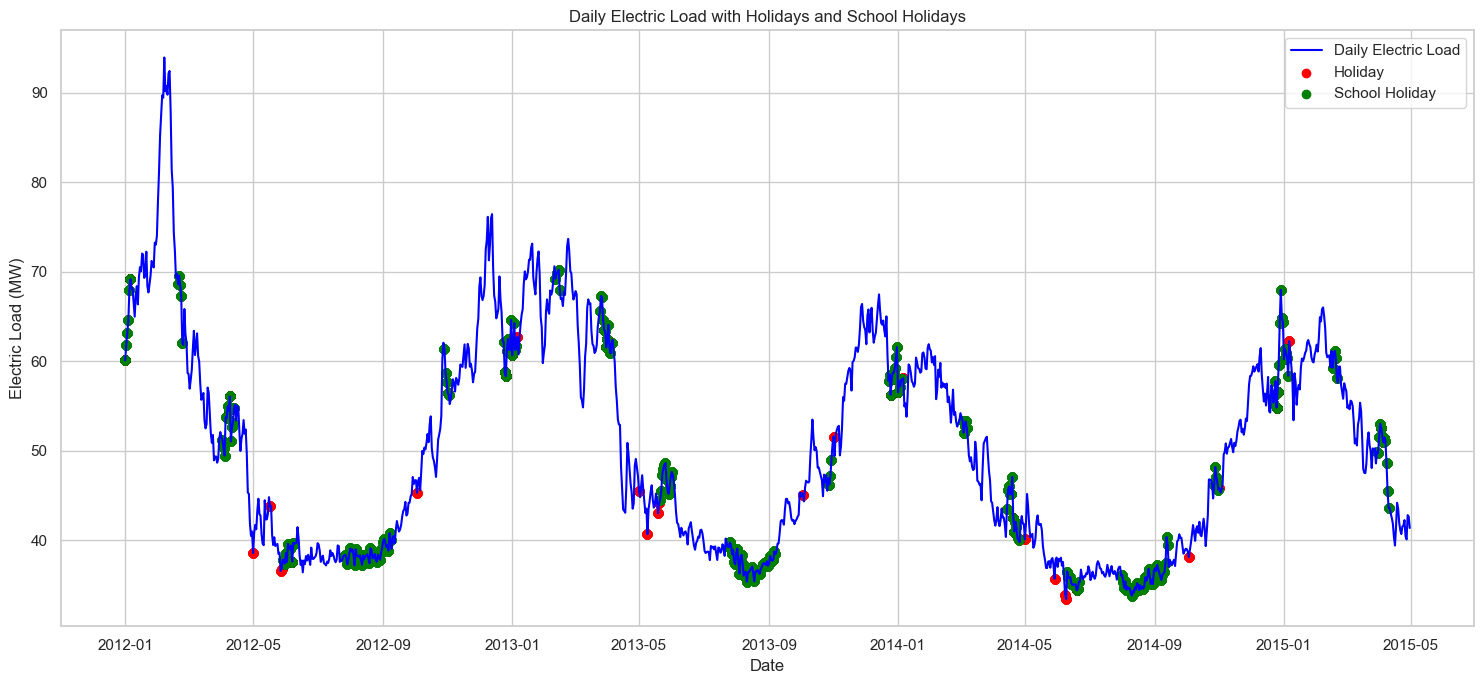

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Angenommen, `merged_df` ist dein finaler DataFrame mit aggregierten täglichen Lasten und Feiertagsinformationen
# merged_df sollte 'temp_date', 'mean_electricLoad', 'holiday', und 'schoolHoliday' Spalten enthalten

plt.figure(figsize=(15, 7))
plt.plot(load_data_with_mean_electricLoad['temp_date'], load_data_with_mean_electricLoad['mean_electricLoad'], label='Daily Electric Load', color='blue')

# Markiere Feiertage
plt.scatter(load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['holiday'] == 1]['temp_date'], 
            load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['holiday'] == 1]['mean_electricLoad'], 
            color='red', label='Holiday')

# Markiere Schulferien
plt.scatter(load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['schoolHoliday'] == 1]['temp_date'], 
            load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['schoolHoliday'] == 1]['mean_electricLoad'], 
            color='green', label='School Holiday')

plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Daily Electric Load with Holidays and School Holidays')
plt.legend()
plt.tight_layout()
plt.savefig(path + "/lectricLoad_holiday.jpg")

plt.show()


In [25]:
# Berechne tägliche Maxima und Minima
daily_max = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].max().reset_index(name='daily_max')
daily_min = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].min().reset_index(name='daily_min')
daily_mean = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].mean().reset_index(name='daily_mean')
# Füge Feiertagsinformationen hinzu (angenommen, diese existieren bereits im DataFrame)
daily_stats = pd.merge(daily_max, daily_min, on='temp_date')
daily_stats = pd.merge(daily_stats, daily_mean, on='temp_date')
daily_stats = pd.merge(daily_stats, load_data_with_mean_electricLoad[['temp_date', 'holiday']].drop_duplicates(), on='temp_date', how='left')


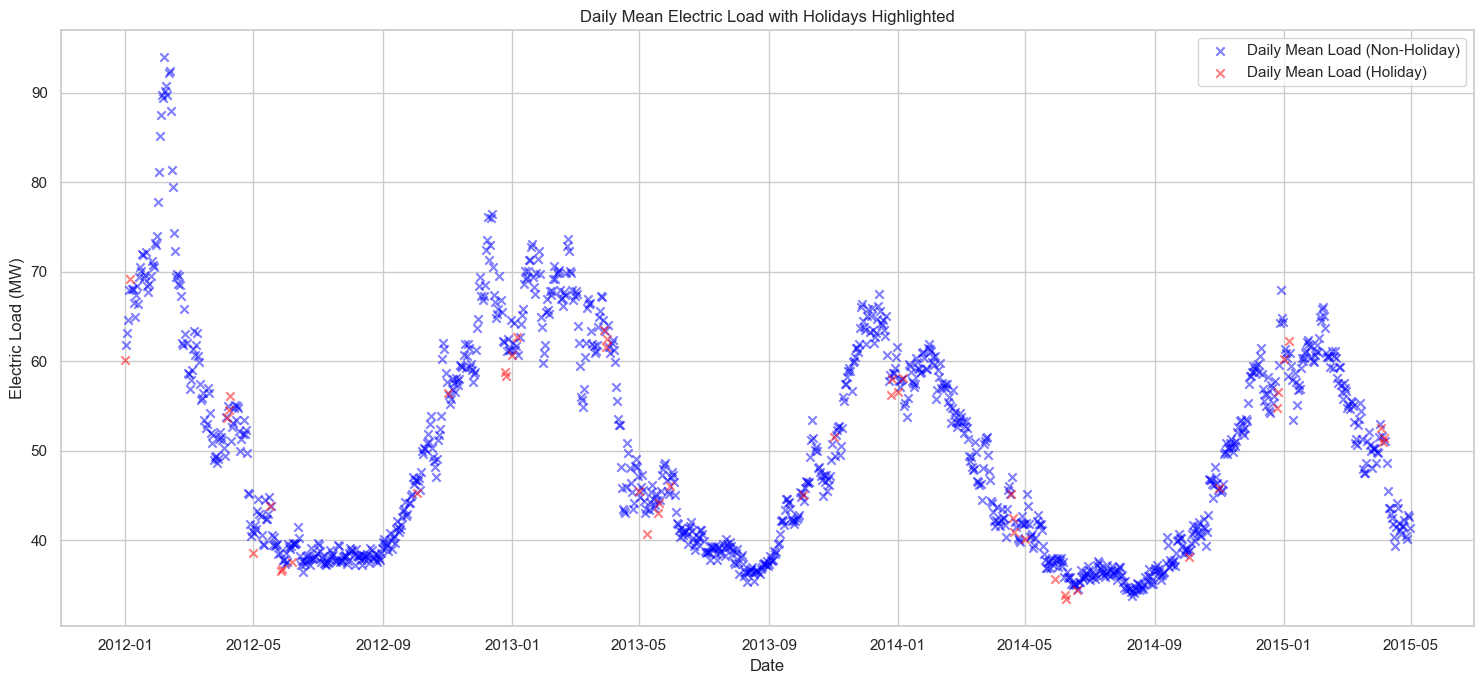

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))

# Erstelle separate DataFrames für Feiertage und Nicht-Feiertage
holiday_data = daily_stats[daily_stats['holiday'] == 1]
non_holiday_data = daily_stats[daily_stats['holiday'] == 0]

# Plotte tägliche Maxima und Minima für Nicht-Feiertage
# plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_max'], color='blue', marker='^', label='Daily Max Load (Non-Holiday)', alpha=0.5)
# plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_min'], color='blue', marker='v', label='Daily Min Load (Non-Holiday)', alpha=0.5)
plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_mean'], color='blue', marker='x', label='Daily Mean Load (Non-Holiday)', alpha=0.5)
# Plotte tägliche Maxima und Minima für Feiertage
# plt.scatter(holiday_data['temp_date'], holiday_data['daily_max'], color='red', marker='^', label='Daily Max Load (Holiday)', alpha=0.5)
plt.scatter(holiday_data['temp_date'], holiday_data['daily_mean'], color='red', marker='x', label='Daily Mean Load (Holiday)', alpha=0.5)

plt.title('Daily Mean Electric Load with Holidays Highlighted')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.legend()

# Anpassung für bessere Darstellung
plt.tight_layout()
plt.savefig(path + "/lectricLoad_holiday_2.jpg")

# Zeige den Plot
plt.show()

In [27]:
df= load_data_with_mean_electricLoad
print("Mittelwert:", df['electricLoad'].mean())
print("Median:", df['electricLoad'].median())
print("Standardabweichung:", df['electricLoad'].std())
print("Varianz:", df['electricLoad'].var())
print("Minimum:", df['electricLoad'].min())
print("Maximum:", df['electricLoad'].max())


Mittelwert: 50.16353429961624
Median: 49.27
Standardabweichung: 14.464277041519276
Varianz: 209.2153103338216
Minimum: 18.52
Maximum: 112.2


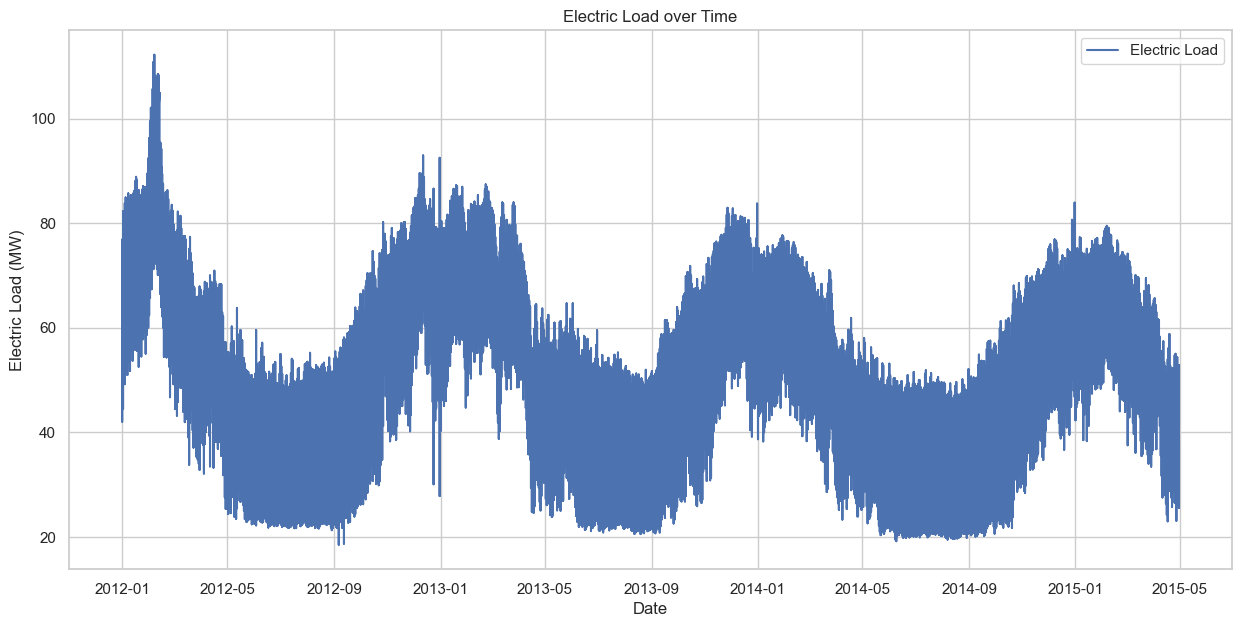

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df['temp_date'], df['electricLoad'], label='Electric Load')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Electric Load over Time')
plt.legend()
plt.savefig(path + "/lectricLoad.jpg")

plt.show()


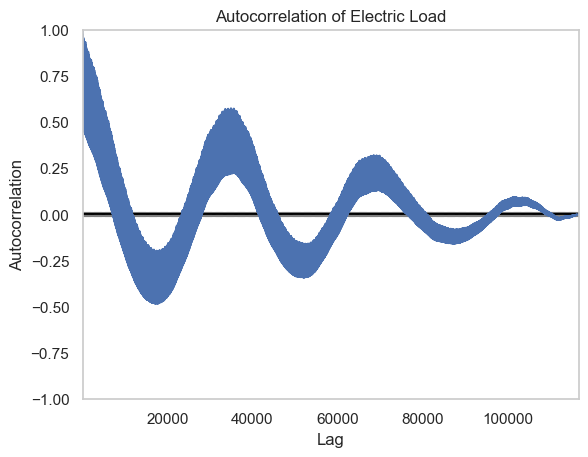

In [29]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['electricLoad'])
plt.title('Autocorrelation of Electric Load')
plt.savefig(path + "/lectricLoad_autocorrelation.jpg")

plt.show()


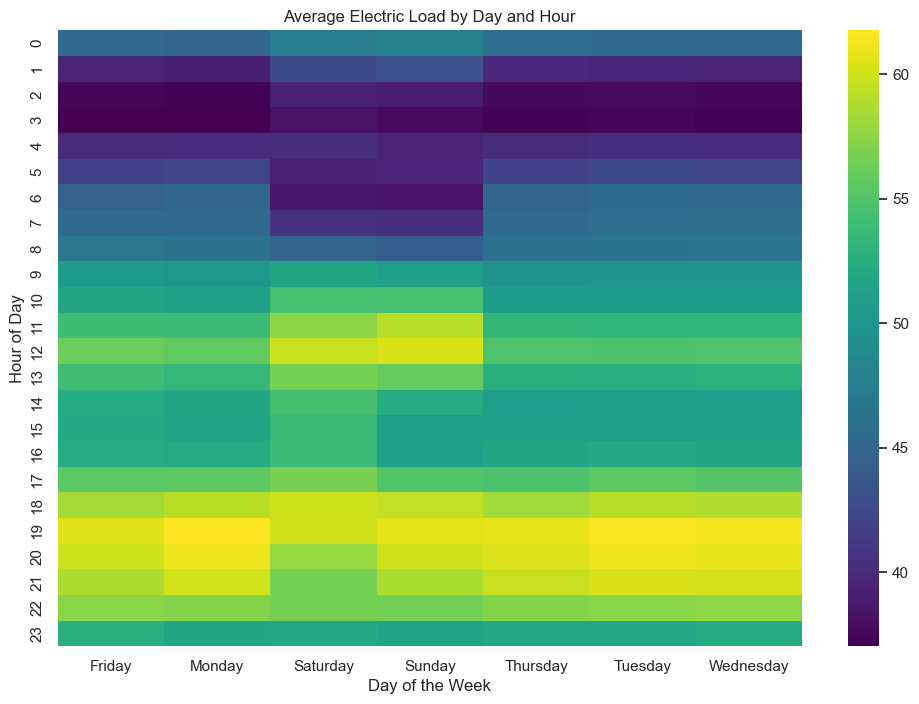

In [30]:
import seaborn as sns

# Erstelle eine Pivot-Tabelle
pivot_table = df.pivot_table(values='electricLoad', index=df['startDate_hour'], columns=df['temp_date'].dt.day_name(), aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Average Electric Load by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.savefig(path + "/AverageElectricLoadDayHour.jpg")

plt.show()


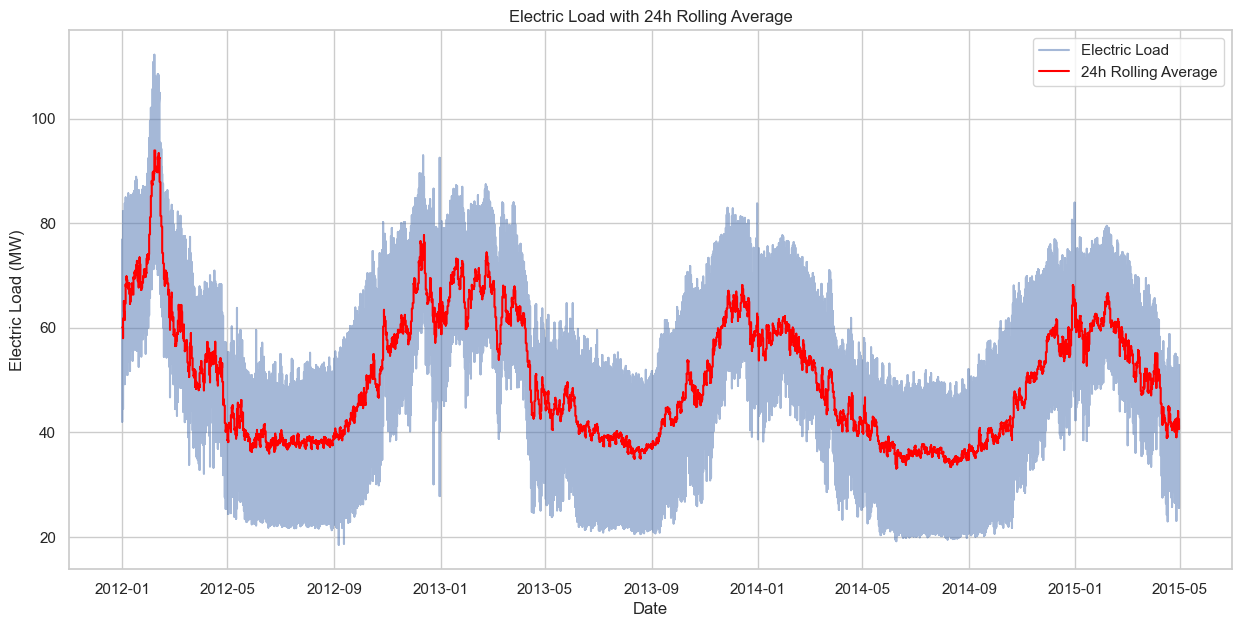

In [31]:
df['rolling_avg'] = df['electricLoad'].rolling(window=24*4).mean()  

plt.figure(figsize=(15, 7))
plt.plot(df['temp_date'], df['electricLoad'], label='Electric Load', alpha=0.5)
plt.plot(df['temp_date'], df['rolling_avg'], label='24h Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Electric Load with 24h Rolling Average')
plt.legend()
plt.savefig(path + "/ElectricLoadRollingAverage.jpg")

plt.show()


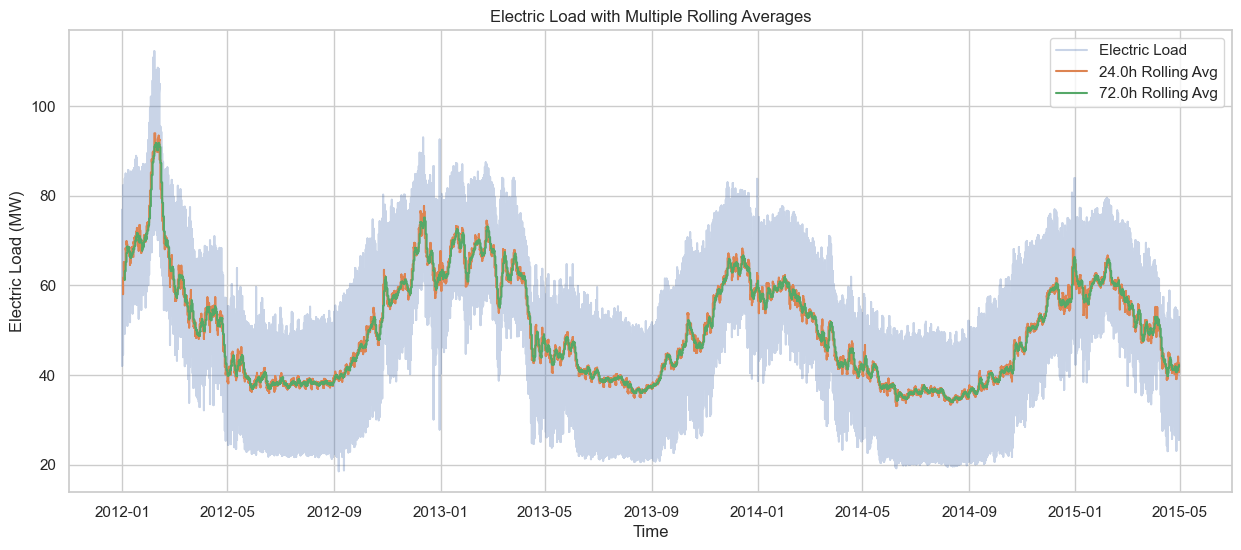

In [32]:
from src.preprocessing import add_rolling_average_electric_load

lags = [24*4, 24*4*3]  #1 Tag, 3 Tage


import matplotlib.pyplot as plt


plt.figure(figsize=(15, 6))

plt.plot(load_data_with_mean_electricLoad['temp_date'], load_data_with_mean_electricLoad['electricLoad'], label='Electric Load', alpha=0.3)
# Berechne und plotte gleitende Durchschnitte für verschiedene Lags
for lag in lags:
    # Berechne den gleitenden Durchschnitt für den aktuellen Lag
    rolling_average = add_rolling_average_electric_load(load_data_with_mean_electricLoad, 'electricLoad', lag)
    
    # Plotte den gleitenden Durchschnitt
    plt.plot(rolling_average['temp_date'], rolling_average[f'electricLoad_rolling_avg_{lag}'], label=f'{lag/4}h Rolling Avg')

plt.title('Electric Load with Multiple Rolling Averages')
plt.xlabel('Time')
plt.ylabel('Electric Load (MW)')
plt.legend()
plt.savefig(path + "/ElectricLoadRollingAverage2.jpg")

plt.show()



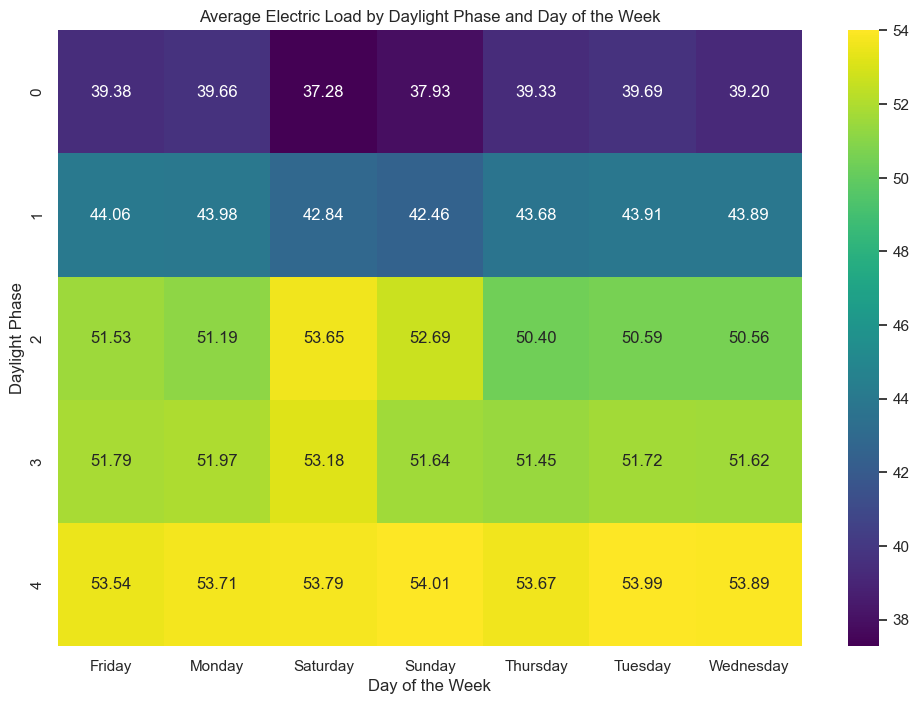

In [33]:
from src.preprocessing import get_daylight_phase

load_data['daylight_phase'] = load_data.apply(get_daylight_phase, axis=1)
# Erstelle eine Pivot-Tabelle für die Heatmap
pivot_table = load_data.pivot_table(values='electricLoad', index='daylight_phase', columns=df['temp_date'].dt.day_name(), aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.title('Average Electric Load by Daylight Phase and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daylight Phase')
plt.savefig(path + "/ElectricLoadDaylight.jpg")

plt.show()


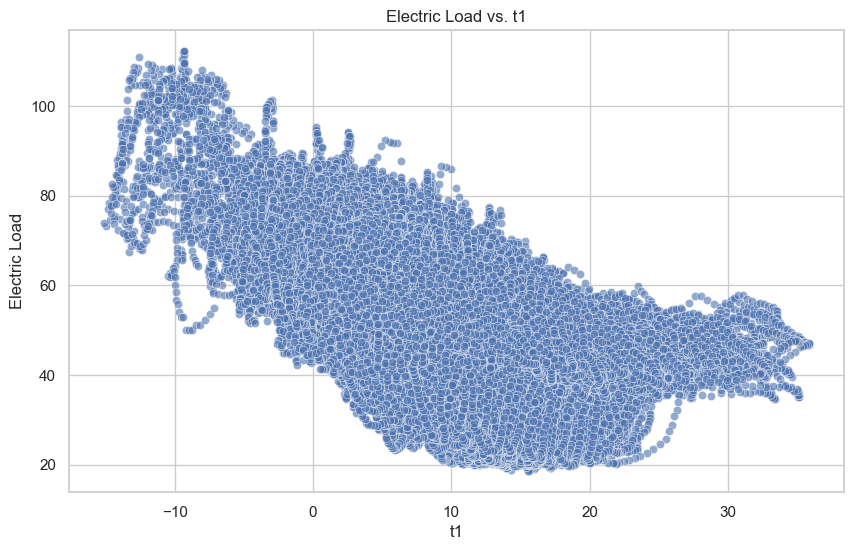

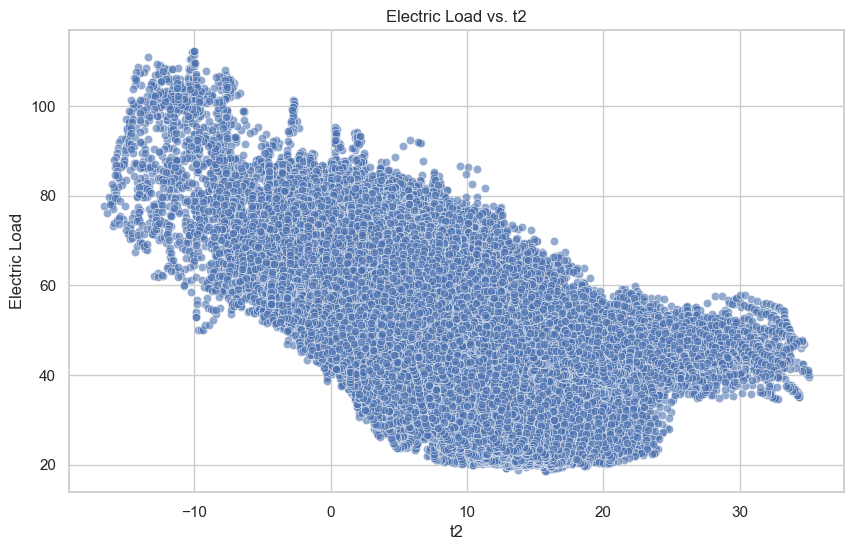

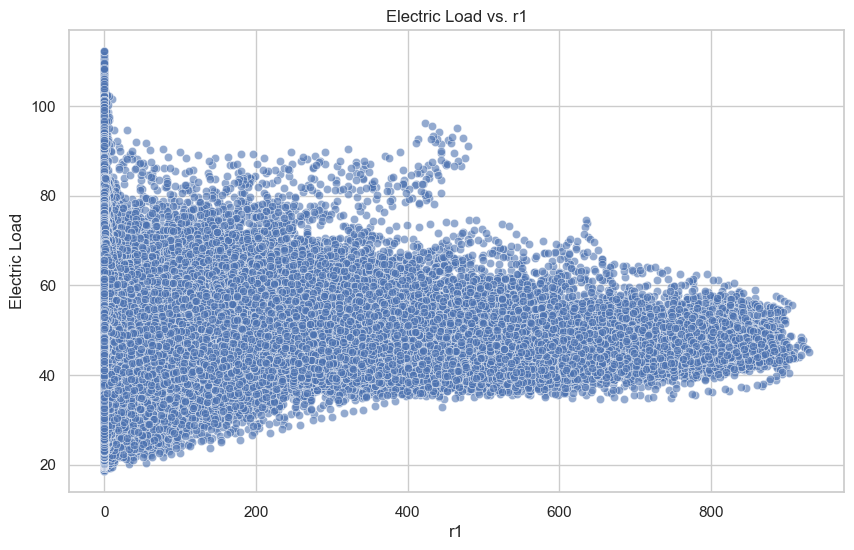

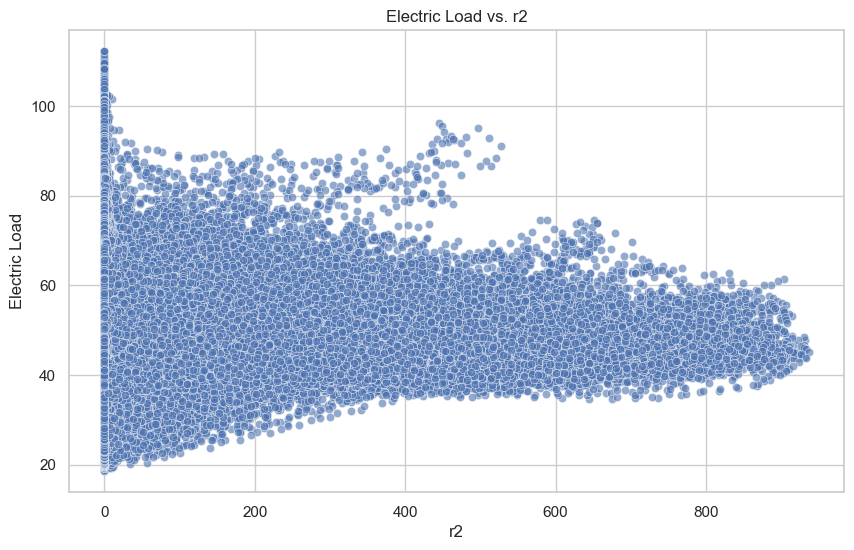

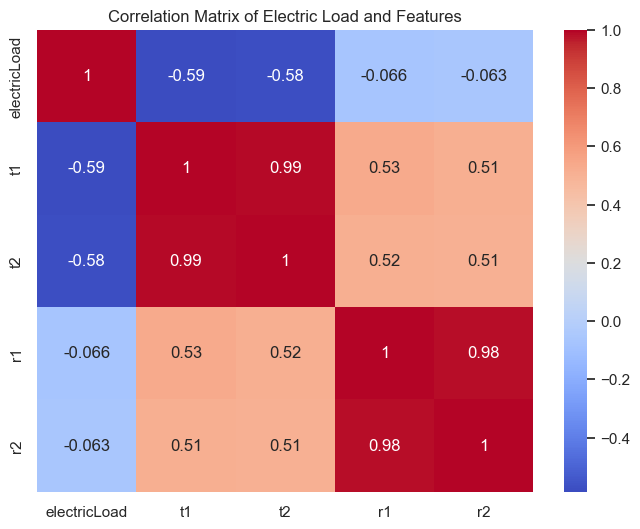

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angenommen, df ist Ihr DataFrame
# df = pd.read_csv('your_data.csv')  # Beispiel, wie Sie Ihren DataFrame laden könnten

# Überprüfen, welche der gewünschten Spalten vorhanden sind
available_columns = df.columns
features_to_plot = ['t1', 't2', 'r1', 'r2']
features_exist = [feature for feature in features_to_plot if feature in available_columns]

# Erstellen von Plots für jede vorhandene Feature-Spalte
for feature in features_exist:
    # Scatterplot für Feature gegen electricLoad
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='electricLoad', alpha=0.6)
    plt.title(f'Electric Load vs. {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Electric Load')
    plt.show()

    # Optional: Erstellen einer Heatmap zur Untersuchung der Korrelation, wenn mehrere Features vorhanden sind
    # Dies ist sinnvoll, wenn Sie mehrere Features gleichzeitig betrachten möchten
if len(features_exist) > 1:
    # Auswahl der relevanten Spalten für die Korrelationsmatrix
    cols_for_corr = ['electricLoad'] + features_exist
    corr_matrix = df[cols_for_corr].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.savefig(path + "/CorrelationElectricLoadFeatures.jpg")
    plt.title('Correlation Matrix of Electric Load and Features')
    plt.show()
